# 20 - Confidence Intervals

A **confidence interval** gives a range where we believe the true value lies.

**Key Idea:** We rarely know the exact truth, so we give a range with a confidence level.

**Plain Explanation:** Instead of saying "the average is exactly 100", we say "we're 95% confident the average is between 90 and 110."

**Story/Analogy:** "I don't know exactly how tall you are, but I'm 95% sure you're between 5'8" and 6'0"."

**Confidence Level:**
- 95% confidence = If we repeated this many times, 95% of our intervals would contain the true value
- Wider intervals = more confidence, but less precise
- Narrower intervals = more precise, but less confidence

## Simple Example: Guessing Someone's Height

You meet someone and try to estimate their height without measuring directly.

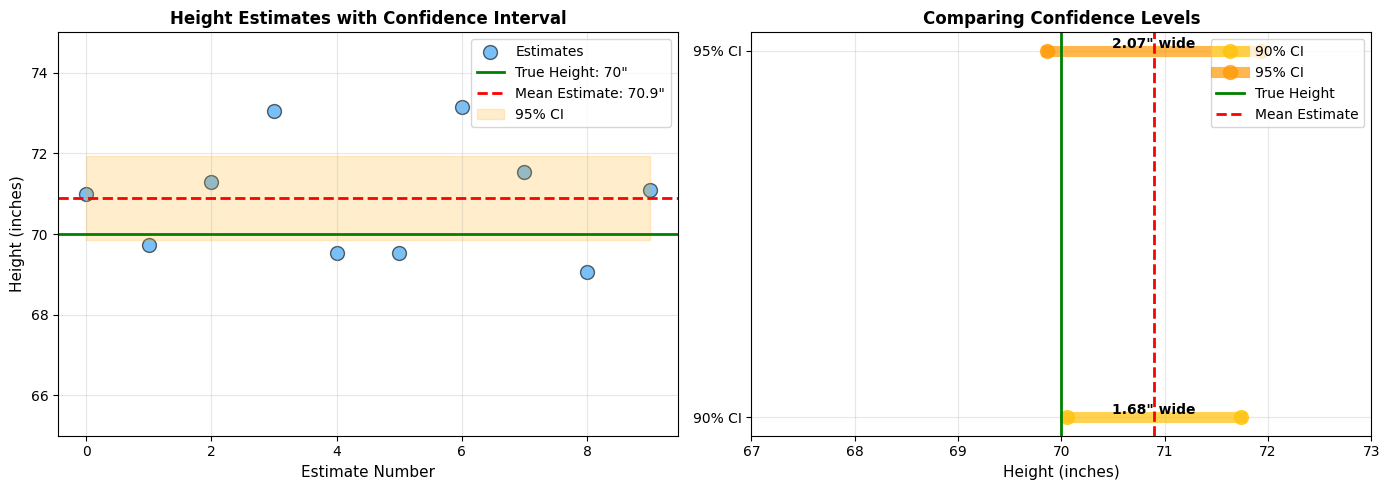


True Height: 70" (5'10")
Mean Estimate: 70.9"

90% Confidence Interval: [70.1", 71.7"] → 1.7" wide
95% Confidence Interval: [69.9", 71.9"] → 2.1" wide

→ Higher confidence = Wider interval (less precise but more certain)
→ Both intervals contain the true height!


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# True height (unknown to us)
true_height = 70  # 5'10" in inches

# We take several quick estimates (with measurement error)
np.random.seed(42)
estimates = np.random.normal(true_height, 2, 10)  # 10 estimates, 2-inch error

# Calculate 95% confidence interval
mean_estimate = np.mean(estimates)
std_error = stats.sem(estimates)  # Standard error of the mean
ci_95 = stats.t.interval(0.95, len(estimates)-1, loc=mean_estimate, scale=std_error)

# Calculate 90% confidence interval (narrower)
ci_90 = stats.t.interval(0.90, len(estimates)-1, loc=mean_estimate, scale=std_error)

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Individual estimates
ax1.scatter(range(len(estimates)), estimates, s=100, alpha=0.6, color='#2196F3', edgecolor='black', label='Estimates')
ax1.axhline(true_height, color='green', linestyle='-', linewidth=2, label=f'True Height: {true_height}"')
ax1.axhline(mean_estimate, color='red', linestyle='--', linewidth=2, label=f'Mean Estimate: {mean_estimate:.1f}"')
ax1.fill_between(range(len(estimates)), ci_95[0], ci_95[1], alpha=0.2, color='orange', label='95% CI')
ax1.set_xlabel('Estimate Number', fontsize=11)
ax1.set_ylabel('Height (inches)', fontsize=11)
ax1.set_title('Height Estimates with Confidence Interval', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)
ax1.set_ylim([65, 75])

# Confidence interval comparison
intervals = ['90% CI', '95% CI']
ci_ranges = [(ci_90[0], ci_90[1]), (ci_95[0], ci_95[1])]
colors = ['#FFC107', '#FF9800']

for i, (label, (lower, upper), color) in enumerate(zip(intervals, ci_ranges, colors)):
    ax2.plot([lower, upper], [i, i], 'o-', linewidth=8, markersize=10, color=color, alpha=0.7, label=label)
    ax2.text(mean_estimate, i, f'{upper-lower:.2f}" wide', 
             ha='center', va='bottom', fontweight='bold', fontsize=10)

ax2.axvline(true_height, color='green', linestyle='-', linewidth=2, label='True Height')
ax2.axvline(mean_estimate, color='red', linestyle='--', linewidth=2, label='Mean Estimate')
ax2.set_xlabel('Height (inches)', fontsize=11)
ax2.set_title('Comparing Confidence Levels', fontsize=12, fontweight='bold')
ax2.set_yticks(range(len(intervals)))
ax2.set_yticklabels(intervals)
ax2.legend(loc='upper right')
ax2.grid(alpha=0.3)
ax2.set_xlim([67, 73])

plt.tight_layout()
plt.show()

print(f"\nTrue Height: {true_height}\" (5'10\")")
print(f"Mean Estimate: {mean_estimate:.1f}\"")
print(f"\n90% Confidence Interval: [{ci_90[0]:.1f}\", {ci_90[1]:.1f}\"] → {ci_90[1]-ci_90[0]:.1f}\" wide")
print(f"95% Confidence Interval: [{ci_95[0]:.1f}\", {ci_95[1]:.1f}\"] → {ci_95[1]-ci_95[0]:.1f}\" wide")
print(f"\n→ Higher confidence = Wider interval (less precise but more certain)")
print(f"→ Both intervals contain the true height!")

## Real-World Example: Daily Sales Prediction

A store wants to estimate average daily sales. They sample several days and calculate a confidence interval.

**Key Question:** How does sample size affect the width of our confidence interval?

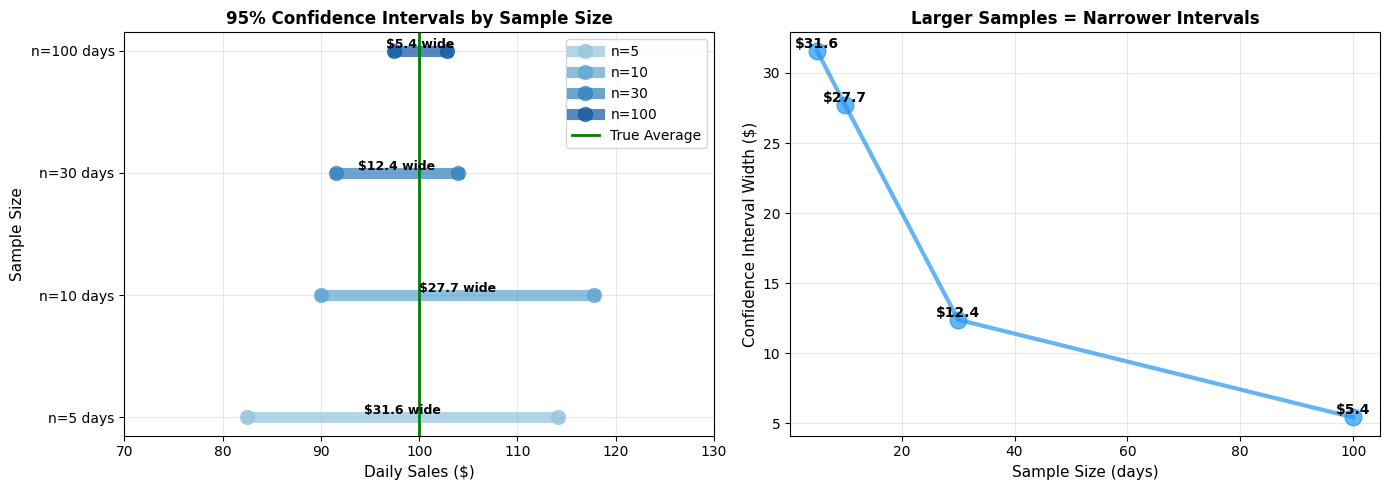


📊 Daily Sales Confidence Intervals (95% confidence):
n=  5 days: $ 82.53 to $114.12 ($31.59 wide) ✓
n= 10 days: $ 90.05 to $117.75 ($27.70 wide) ✓
n= 30 days: $ 91.55 to $103.95 ($12.40 wide) ✓
n=100 days: $ 97.39 to $102.82 ($ 5.42 wide) ✓

True Average: $100.00

💡 Business Insights:
   → Small sample (5 days): Wide interval = more uncertainty
   → Large sample (100 days): Narrow interval = precise estimate
   → All intervals contain the true value (that's what 95% means!)
   → More data = better decisions with less risk


In [2]:
# True average daily sales (unknown to the business)
true_avg_sales = 100  # dollars per day

# Simulate sales data with some daily variation
np.random.seed(42)
all_sales = np.random.normal(true_avg_sales, 15, 1000)  # 1000 days of data

# Compare different sample sizes
sample_sizes = [5, 10, 30, 100]
results = []

for n in sample_sizes:
    sample = np.random.choice(all_sales, n, replace=False)
    mean_sales = np.mean(sample)
    std_error = stats.sem(sample)
    ci = stats.t.interval(0.95, n-1, loc=mean_sales, scale=std_error)
    results.append({
        'n': n,
        'mean': mean_sales,
        'ci': ci,
        'width': ci[1] - ci[0]
    })

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Confidence intervals by sample size
for i, result in enumerate(results):
    lower, upper = result['ci']
    ax1.plot([lower, upper], [i, i], 'o-', linewidth=8, markersize=10, 
             color=plt.cm.Blues(0.4 + i*0.15), alpha=0.7, 
             label=f"n={result['n']}")
    ax1.text(result['mean'], i, f"${result['width']:.1f} wide", 
             ha='center', va='bottom', fontweight='bold', fontsize=9)

ax1.axvline(true_avg_sales, color='green', linestyle='-', linewidth=2, label='True Average')
ax1.set_xlabel('Daily Sales ($)', fontsize=11)
ax1.set_ylabel('Sample Size', fontsize=11)
ax1.set_title('95% Confidence Intervals by Sample Size', fontsize=12, fontweight='bold')
ax1.set_yticks(range(len(results)))
ax1.set_yticklabels([f"n={r['n']} days" for r in results])
ax1.legend(loc='upper right')
ax1.grid(alpha=0.3)
ax1.set_xlim([70, 130])

# Width vs sample size
sample_ns = [r['n'] for r in results]
widths = [r['width'] for r in results]

ax2.plot(sample_ns, widths, 'o-', linewidth=3, markersize=12, color='#2196F3', alpha=0.7)
ax2.set_xlabel('Sample Size (days)', fontsize=11)
ax2.set_ylabel('Confidence Interval Width ($)', fontsize=11)
ax2.set_title('Larger Samples = Narrower Intervals', fontsize=12, fontweight='bold')
ax2.grid(alpha=0.3)

# Add annotations
for n, width in zip(sample_ns, widths):
    ax2.text(n, width, f'${width:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 Daily Sales Confidence Intervals (95% confidence):")
print("="*60)
for result in results:
    lower, upper = result['ci']
    contains = "✓" if lower <= true_avg_sales <= upper else "✗"
    print(f"n={result['n']:3d} days: ${lower:6.2f} to ${upper:6.2f} (${result['width']:5.2f} wide) {contains}")

print(f"\nTrue Average: ${true_avg_sales:.2f}")
print("\n💡 Business Insights:")
print("   → Small sample (5 days): Wide interval = more uncertainty")
print("   → Large sample (100 days): Narrow interval = precise estimate")
print("   → All intervals contain the true value (that's what 95% means!)")
print("   → More data = better decisions with less risk")

## Demonstrating the 95% Confidence Concept

Let's show what "95% confidence" really means: if we repeat the process many times, 95% of intervals will contain the true value.

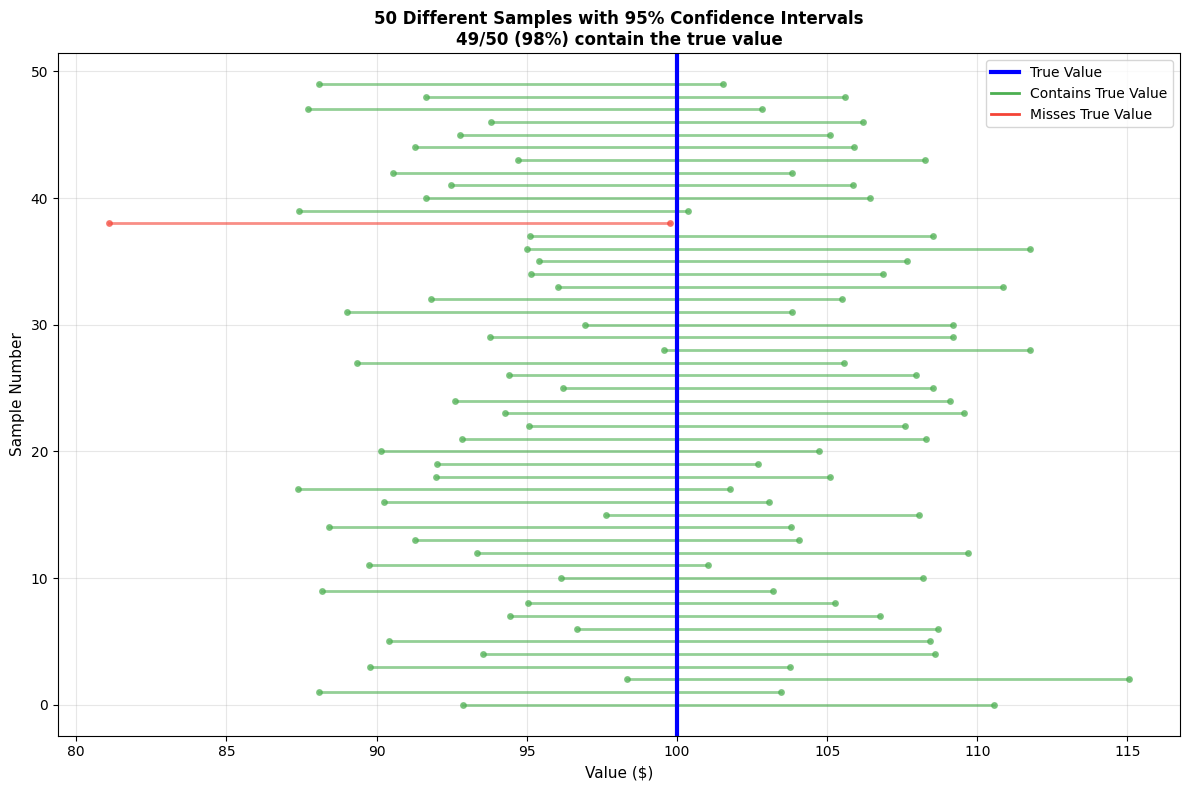


🎯 Confidence Interval Demonstration:
True Value: $100
Number of samples: 50
Intervals containing true value: 49/50 (98%)
Expected at 95% confidence: ~47-48 out of 50

💡 This is what '95% confidence' means:
   → Not that there's a 95% chance the true value is in THIS interval
   → But that 95% of intervals we calculate will contain the true value
   → It's about the long-run reliability of our method!


In [3]:
# Simulate 50 different samples and their confidence intervals
np.random.seed(123)
n_samples = 50
sample_size = 20
true_value = 100

intervals = []
for _ in range(n_samples):
    sample = np.random.normal(true_value, 15, sample_size)
    mean_sample = np.mean(sample)
    std_error = stats.sem(sample)
    ci = stats.t.interval(0.95, sample_size-1, loc=mean_sample, scale=std_error)
    contains_true = ci[0] <= true_value <= ci[1]
    intervals.append((ci[0], ci[1], contains_true))

# Count how many contain the true value
contains_count = sum(1 for _, _, contains in intervals if contains)
contains_pct = contains_count / n_samples * 100

# Visualize
fig, ax = plt.subplots(figsize=(12, 8))

for i, (lower, upper, contains) in enumerate(intervals):
    color = '#4CAF50' if contains else '#F44336'
    ax.plot([lower, upper], [i, i], 'o-', linewidth=2, markersize=4, color=color, alpha=0.6)

ax.axvline(true_value, color='blue', linestyle='-', linewidth=3, label=f'True Value: ${true_value}')
ax.set_xlabel('Value ($)', fontsize=11)
ax.set_ylabel('Sample Number', fontsize=11)
ax.set_title(f'50 Different Samples with 95% Confidence Intervals\n{contains_count}/{n_samples} ({contains_pct:.0f}%) contain the true value', 
             fontsize=12, fontweight='bold')

# Create custom legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='blue', linewidth=3, label='True Value'),
    Line2D([0], [0], color='#4CAF50', linewidth=2, label='Contains True Value'),
    Line2D([0], [0], color='#F44336', linewidth=2, label='Misses True Value')
]
ax.legend(handles=legend_elements, loc='upper right')
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n🎯 Confidence Interval Demonstration:")
print("="*60)
print(f"True Value: ${true_value}")
print(f"Number of samples: {n_samples}")
print(f"Intervals containing true value: {contains_count}/{n_samples} ({contains_pct:.0f}%)")
print(f"Expected at 95% confidence: ~47-48 out of 50")
print("\n💡 This is what '95% confidence' means:")
print("   → Not that there's a 95% chance the true value is in THIS interval")
print("   → But that 95% of intervals we calculate will contain the true value")
print("   → It's about the long-run reliability of our method!")

## Summary: Understanding Confidence Intervals

### Key Concepts
- **Confidence Interval:** A range of values where we believe the true value lies
- **Confidence Level:** How often our method produces intervals containing the true value (e.g., 95%)
- **Width:** Larger samples → narrower intervals → more precision

### Common Misconceptions
❌ **Wrong:** "There's a 95% chance the true value is in this specific interval"  
✅ **Right:** "If we repeated this process many times, 95% of our intervals would contain the true value"

### Business Applications
- **Sales forecasting:** "Average daily sales are between $90-$110 with 95% confidence"
- **Customer satisfaction:** "Average rating is between 4.2-4.5 stars"
- **A/B testing:** "Version B increases sales by 5%-15% with 95% confidence"
- **Inventory planning:** "We need 400-500 units to meet demand with 95% confidence"

### Practical Tips
- 📊 **More data = better:** Larger samples give narrower, more useful intervals
- 🎯 **Balance precision vs. confidence:** 99% is more confident but wider than 95%
- 📈 **Report the interval, not just the mean:** Shows uncertainty honestly
- ⚠️ **Don't overinterpret:** The interval is only as good as your sampling method